# Introduction to Dynamical Systems

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
#%from mpl_toolkits import mplot3d
#%config InlineBackend.figure_format = 'retina'
#import matplotlib as mpl

### Euler Method (Tangent Line Method)

The tangent line approximation of $y$ at $t$ can be written as:
\begin{align}
y(t) &= y_0 + f(t_0,y_0)(t_1-t_0)
\end{align}

When the distance $\|t_1-t_0\|$ is very small, this is a good approximation. The idea is to have a very small fixed time interval $d$ and iteratively approximate the values of $y$ around some neighborhood of $t_0$.

In [2]:
# You should write Euler integration here
# Returns x_(t+1)
def Euler(f, t, x, dt):
    return x+f(t, x)*dt




### Heun's Method (Runge-Kutta $2^{nd}$ order Method)

Heun method is improved version of Euler's, a predictor-corrector method. The method uses dynamics to predict the slope at next step, then corrects Euler's method by averaging two consecutive tangent lines.

This method is a $2^{nd}$ order accurate method which means local error is on the order of $\mathcal{0}(h^3)$.

\begin{align}
y_{t+h} &= y_t + \frac{f(t)+ f(t+h)}{2} h
\end{align}

In [3]:
# You should write Heun integration here

def Heun(f, t, x, dt):
    return x+(f(t,x)+f(t+dt,Euler(f,t,x,dt)))*dt/2



### Runge-Kutta $4^{th}$ order Method
RK4 method, the most famous member of the Runge-Kutta family, is a $4^{th}$ order accurate method which means local error is on the order of $\mathcal{0}(h^5)$. The method is based on the following:

\begin{align}
y(x_t) &= y(x_{t-1}) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)\\
h &= x_t-x_{t-1}\\
k_1 &= h f(x_{t-1},y_{t-1})\\
k_2 &= h f(x_{t-1}+\frac{h}{2}, y_{t-1}+\frac{k_1}{2})\\
k_3 &= h f(x_{t-1}+\frac{h}{2}, y_{t-1}+\frac{k_2}{2})\\
k_4 &= h f(x_{t-1}+\frac{h}{2}, y_{t-1}+k_3)\\
\end{align}

In [56]:
# You should write RK4 integration here


def RK4(f, t, x, dt):
    k1=dt*f(t, x)
    k2=dt*f(t+dt/2,x+k1/2)
    k3=dt*f(t+dt/2,x+k2/2)
    k4=dt*f(t+dt/2,x+k3)
    return x+(k1+2*k2+2*k3+k4)/6
    

### 1-d Differential Equation
We define a $1^{st}$ order differential equation with the general form $\dot{y}=f(y,t)$ where $\dot{y}$ is the derivative of the function $y(t)$ with respect to time $t$.<br>
For a simple example, let us choose the equation $\dot{y}=2y$
with the initial condition that $y(0)=1$. 

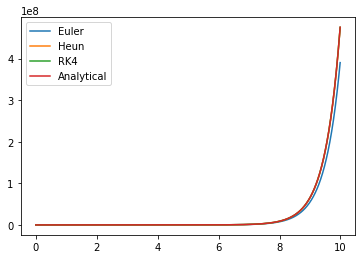

In [119]:
# As an example for 1d diff equation, solve the problem defined above with three integration methods
# Then compare your results with the analytical solution

def f1(t, x):
    return 2*x

def integrate(estimator, f, x ,t=0, dt=0.01, n=1000):
    vals=[x]
    time=[t]
    for i in range(0,n-1):
        vals.append(estimator(f, time[-1], vals[-1], dt))
        time.append(time[-1]+dt)
    
    return np.array(vals), time




Eulerval,t = integrate(Euler,f1,1)
Heunval,t = integrate(Heun,f1,1)
RK4val,t = integrate(RK4,f1,1)
x=0.01
t=np.asarray(t)
y_exact=np.exp(2*t)
plt.plot(t,Eulerval)
plt.plot(t,Heunval)
plt.plot(t,RK4val)
plt.plot(t,y_exact,'-')
plt.legend(["Euler","Heun","RK4", "Analytical"])
        





### 2-d Differential Equation
Now, we are going to take a look at an application of $2^{nd}$ order differential equation, in particular mass-spring problem.
\begin{align}
m \frac{d^{2}y}{dt^2} &= -k y
\end{align}
Assume for simplicity $\frac{k}{m} = 1$ where $k$ is the spring constant and $m$ is the mass. Our problem turns into: 
\begin{align}
\frac{d^{2}y}{dt^2} &= -y
\end{align}

Assume the initial condition is $y(0)=1$ and $\dot{y}(0)=0$

[[ 0.          1.        ]
 [ 0.01        1.        ]
 [ 0.02        0.9999    ]
 ...
 [-0.54481573 -0.89889361]
 [-0.55380467 -0.89344546]
 [-0.56273912 -0.88790741]]


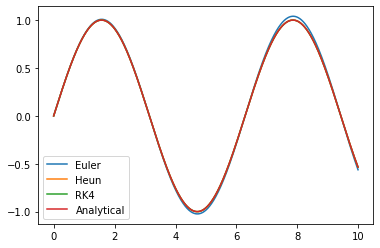

In [126]:
# Now you should compare the results of numerical solutions and analytical solution for a 2d problem

def f2(t,x):
    A=np.array([np.array([0,1]),np.array([-1,0])])
    return np.dot(A,x)
    
x0=np.transpose(np.array([0,1]))

Eulerval,t = integrate(Euler,f2,x0)

Heunval,t = integrate(Heun,f2,x0)
RK4val,t = integrate(RK4,f2,x0)

t=np.asarray(t)
y_exact=np.sin(t)
print(Eulerval[0:])
plt.plot(t,Eulerval[:,0])
plt.plot(t,Heunval[:,0])
plt.plot(t,RK4val[:,0])
plt.plot(t,y_exact)
plt.legend(["Euler","Heun","RK4", "Analytical"])



# Synchronization of Linear Systems

### Synchronization of two linearly coupled linear systems

Analytical investigation predicts that these two systems synchronize at:

\begin{align}
\alpha_c = \frac{a}{2} 
\end{align}

So, as long as

\begin{align}
\alpha_c \geq \frac{a}{2} 
\end{align}

synchronization should occur. Let our systems be by defined by the equations:

\begin{aligned}
\dot{y_1} &= ay_1 + \alpha (y_2 - y_1)\\
\dot{y_2} &= ay_2 + \alpha (y_1 - y_2)
\end{aligned}



In [7]:
# Define a function for two coupled linear system and then integrate it with your Runge-Kutta integrator
# Tune the alpha parameter to see the synchronization case








The synchronization error can be defined by:
\begin{align}
E = \frac{1}{N(N-1)}\sum_{i,j\gt 1} |x_i - x_j|
\end{align}
But as $\|x_i - x_j\| = \|x_j - x_i\| $, this sum could be written as:

\begin{align}
E = \frac{2}{N(N-1)}\sum_{i = 1}^{N} \sum_{j=1}^{i} |x_i - x_j|
\end{align}


In [8]:
# Define a function for synchronization error and then plot the error







### Synchronization of N linearly coupled linear systems

Analytical investigation predicts that these N systems synchronize at:

\begin{align}
\alpha_c = \frac{a}{N} 
\end{align}

where $N$ is the number of variables. So, as long as

\begin{align}
\alpha_c \geq \frac{a}{N} 
\end{align}

systems are expected to synchronize.

Things to note: 

* As $\alpha$ is increased synchronization happens much fast. Is that expected?
* At $\alpha = \frac{a}{N}$ systems are neutrally stable?
* What happens as N tends to infinity?

\begin{align}
\dot{y_i} = ay_i + \alpha \sum_{j=1}^{N} (y_j - y_i)
\end{align}

In [9]:
# Define a function for N linearly coupled linear systems
# Use RK4 algorithm for the integration
# Tune the alpha parameter around its critical value and see the behaviour
# Plot the synchronization error









